# Capstone 2: Obesity in America
## Exploratory Data Analysis

The goal of this step is to explore the data relationships of all of the features and understand how the features compare to the response variable. The response variable we will be looking at is percent obesity. 

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
cd springboard/Capstone2Project/data/

/Users/erinquense/springboard/Capstone2Project/data


In [4]:
df = pd.read_csv('df_wrangled.csv', index_col=0)

In [5]:
df.head(3)

,Year,LocationAbbr,Location,LocationID,Age,overweight,obese,some_activity,some_and_muslce,more_activity,Strength_training,no_physical_activity,fruit,vegetables,Education,Gender,Income,Race/Ethnicity,Total
0,2011,AK,Alaska,2,18 - 24,32.0,19.8,62.8,34.9,32.4,51.9,16.1,45.0,29.1,NaN,NaN,NaN,NaN,NaN
1,2011,AK,Alaska,2,25 - 34,38.7,23.5,57.6,27.0,35.7,36.4,18.1,43.6,18.8,NaN,NaN,NaN,NaN,NaN
2,2011,AK,Alaska,2,35 - 44,38.9,29.5,55.3,22.2,32.3,30.8,21.1,42.3,18.4,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [7]:
df.Location.value_counts(normalize=True)

National                0.020606
Washington              0.020115
Colorado                0.019747
Maryland                0.019747
California              0.019747
Arizona                 0.019625
Minnesota               0.019625
Ohio                    0.019625
Massachusetts           0.019625
New Jersey              0.019625
Utah                    0.019502
North Carolina          0.019502
South Carolina          0.019502
Florida                 0.019502
Nevada                  0.019379
Michigan                0.019379
Connecticut             0.019379
New Mexico              0.019379
Kansas                  0.019379
Nebraska                0.019379
Virginia                0.019257
Texas                   0.019134
Hawaii                  0.019134
Oklahoma                0.019011
Georgia                 0.019011
Indiana                 0.018889
New York                0.018889
Alaska                  0.018889
Kentucky                0.018766
Rhode Island            0.018766
District o

In [29]:
df.shape

(8153, 19)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LocationID,8153.0,30.390040,17.037228,1.0,17.0,30.0,44.00,78.0
overweight,8127.0,34.926467,4.673879,10.1,32.4,35.4,37.90,58.3
obese,8127.0,28.929384,6.929260,0.9,25.4,29.4,33.25,60.4
some_activity,3994.0,50.202479,7.547899,24.0,45.2,50.3,55.30,77.6
some_and_muslce,3991.0,20.094287,5.643522,2.2,16.3,19.7,23.40,46.5
more_activity,3991.0,31.250388,6.088415,12.5,27.1,31.1,35.10,64.9
Strength_training,4003.0,29.640919,7.141949,3.3,24.9,29.2,33.80,61.0
no_physical_activity,8119.0,25.560488,8.053705,2.5,20.0,25.1,30.70,60.5
fruit,3998.0,40.174562,6.975817,9.6,35.4,40.0,44.90,63.0
vegetables,3996.0,23.804555,6.774396,3.6,19.2,23.1,27.90,50.8


The histogram below is a visualization of the statistical description of the response variable, % obese. Of the 8,153 observations in the dataset, the average (or mean) reported % obese in 28.93%.  The minimum reported is 0.9% and the maximum is 60.4, although 75% of the reported % obese is less than 33.25%.  

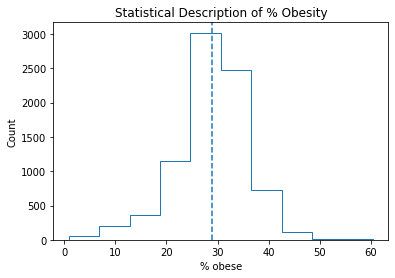

In [22]:
plt.hist(df['obese'], histtype='step')
_ = plt.axvline(df['obese'].mean(), linestyle='dashed')
plt.xlabel('% obese')
plt.ylabel('Count')
plt.title('Statistical Description of % Obesity')
_ = plt.show()

What is difference in overall % obesity in America between 2011 and 2016?  The scatter plot below shows us that between 2011 and 2016, the overall rate of obesity has increased from 27.4% to 29.6%

In [27]:
national = df[df['Location'] == 'National']
national = national[national['Total'] == 'Total']

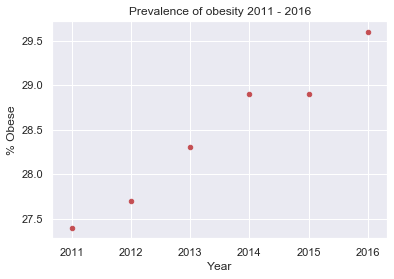

In [28]:
national.plot.scatter(x='Year', y='obese', c='r')
plt.xlabel('Year')
plt.ylabel('% Obese')
plt.title('Prevalence of obesity 2011 - 2016')
plt.show()

There is a big range between the minimum and maximum reported % obesity.  Which states have the least and highest reported obesity? The count plots below show that Colorado has the highest count of less than 25% obese reported and West Virginia has the highest count of greater than 34% obesity reported (followed by Mississippi and Louisiana).  

In [31]:
moreobese = df.loc[df['obese'] > 34]
lessobese = df.loc[df['obese'] < 25]

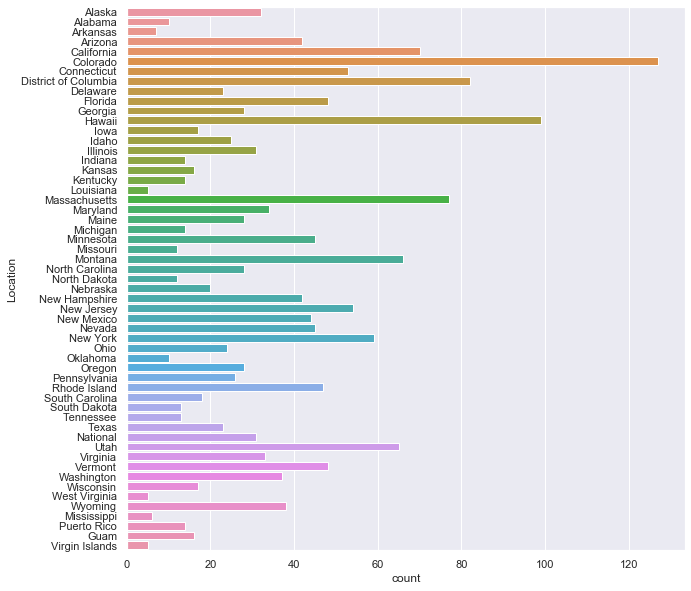

In [36]:
_ = sns.countplot(y='Location', data=lessobese)
plt.rcParams['figure.figsize']=(15,15)

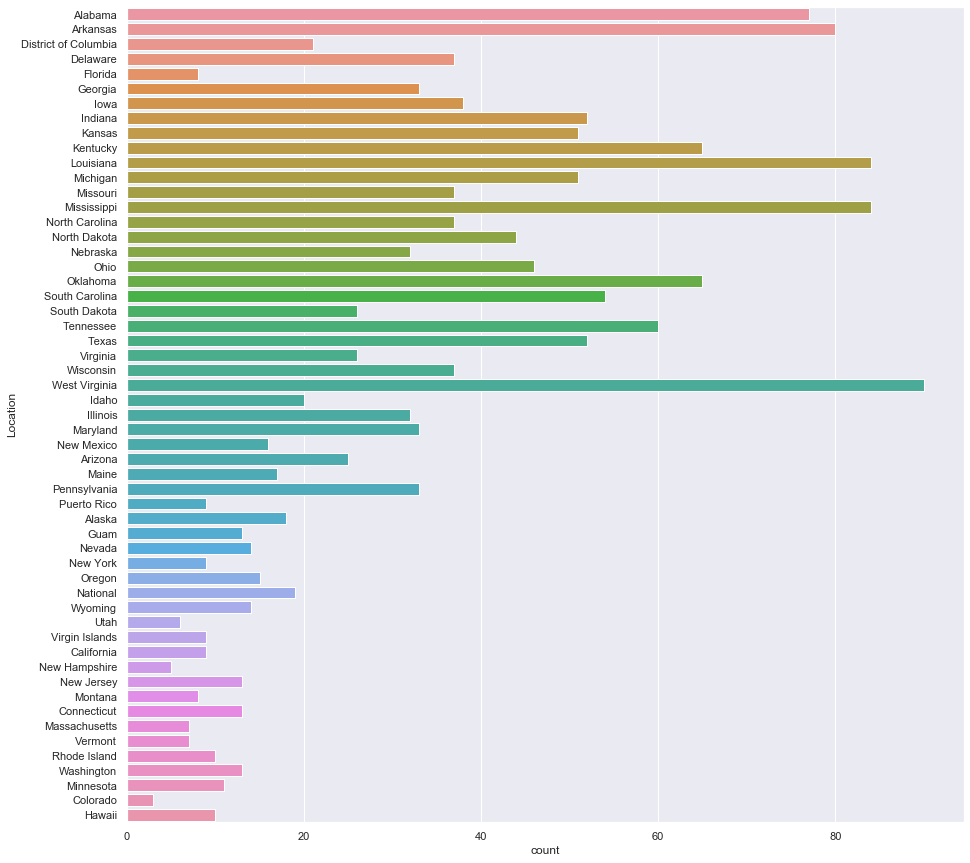

In [39]:
plt.rcParams['figure.figsize']=(15,15)
_ = sns.countplot(y='Location', data=moreobese)

How do the features of the dataset relate to the response variable?

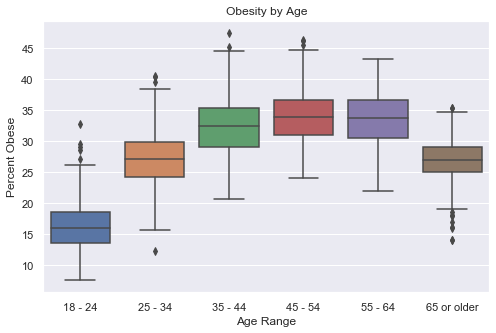

In [48]:
sns.set()
plt.rcParams['figure.figsize']=(8,5)
sns.boxplot(x='Age', y='obese', data=df)
plt.xlabel('Age Range')
plt.ylabel('Percent Obese')
plt.title('Obesity by Age')
plt.show()

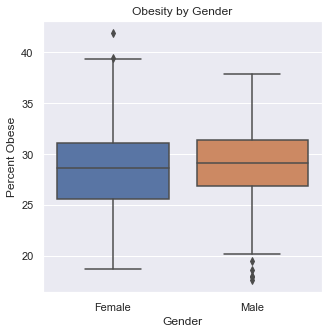

In [57]:
sns.set()
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(x='Gender', y='obese', data=df)
plt.xlabel('Gender')
plt.ylabel('Percent Obese')
plt.title('Obesity by Gender')
plt.show()

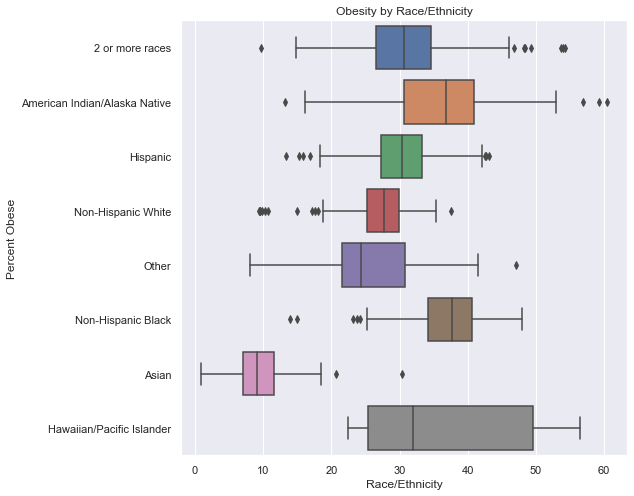

In [53]:
sns.set()
sns.boxplot(x='obese', y='Race/Ethnicity', data=df)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent Obese')
plt.title('Obesity by Race/Ethnicity')
plt.show()

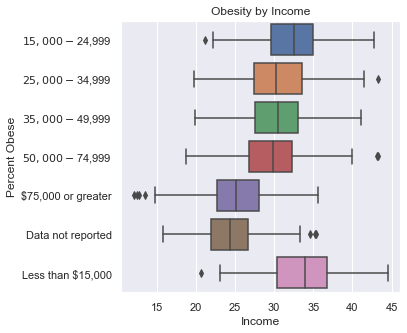

In [56]:
sns.set()
plt.rcParams['figure.figsize']=(5,5)
sns.boxplot(x='obese', y='Income', data=df)
plt.xlabel('Income')
plt.ylabel('Percent Obese')
plt.title('Obesity by Income')
plt.show()

The count plots below show for which categorical variables have the highest count of least and most reported % obese.  For example, it appears that American Indian/Alaska Native appears the most often in the data we determined to be the highest reported obesity, while Asian appears the most of the least reported obesity. 

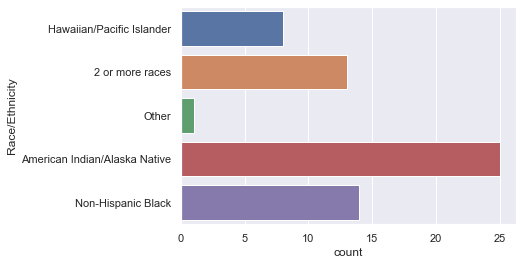

In [130]:
_ = sns.countplot(y='Race/Ethnicity', data=moreobese)

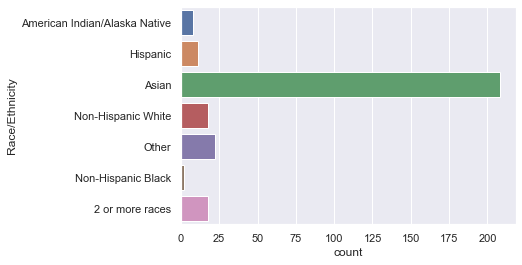

In [131]:
_ = sns.countplot(y='Race/Ethnicity', data=lessobese)

The heatmap below shows the correlations between variables. 

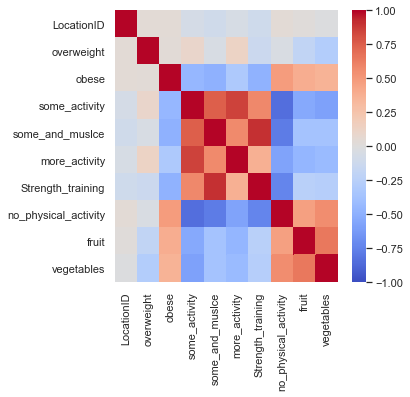

In [60]:
_ = sns.heatmap(df.corr(),vmin=-1, cmap='coolwarm')